In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import random as rnd
import statistics as stat
import numpy as np

In [2]:
# --- globals --- #

# let there be n agents with random initial assesements
# every agent is represented by an integer in [0, n)
n = 40
epsilon = .1
alpha = .98
noise = .2
tau = .4
max_time = 20
data = []

In [3]:
# --- classes --- #

class Agent:
    def __init__(self, id):
        self.assesment = 1 - rnd.random() # values in (0, 1]
        self.previous_assesment = self.assesment # later needed to make the assesments of all agents change simultaneously
        self.peers = set()
        self.id = id
    
    def __str__(self):
        return f"assesment: {self.assesment} and peers: {self.peers}"

    def __repr__(self):
        return f"(Agent [{self.id}]: {self.assesment:.2f}, {self.peers})"

    def update_peers(self, agent_list):
        for potential_peer in agent_list:
            if (abs(potential_peer.assesment - self.assesment) < epsilon):
                self.peers.add(potential_peer)

In [4]:
# --- functions --- #

def print_agent_list(agent_list):
    print("[")
    for agent in agent_list:
        representation = f"    (Agent [{agent.id}]: {agent.assesment:.2f}, " + "{"
        representation += ", ".join(f"[{peer.id}]" for peer in agent.peers) + "})"
    
        print(representation)
    print("]")

In [5]:
# --- main code for abm --- #

agents = []
for i in range(n):
    agent = Agent(i)
    agents.append(agent)
    data.append([agent.id, 0, agent.assesment])

In [6]:
# for each agent let there be a set of agents with similar assesments
for i in range(n):
    agents[i].update_peers(agents)

In [7]:
# for each time step
for u in range(1, max_time): # we did the fist step by setting everything up

    # update the assesment of each agent to a ratio between the agents assesments and the mean of their peers
    for agent in agents:

        # observing
        observation = np.random.normal(tau, noise) # random value from bell curve around tau with noise as 2 std deviations
        while observation <= 0 or observation > 1: # cutting off observations outside (0, 1]
            observation = np.random.normal(tau, noise/2)
        observation *= (1 - alpha)

        # listening to peers
        collective_peer_assesment = alpha * stat.mean([peer.previous_assesment for peer in agent.peers])

        agent.assesment = observation + collective_peer_assesment
        data.append([agent.id, u, agent.assesment])

    # update each agents peers and prepare previous assesment for next loop
    for agent in agents:
        agent.update_peers(agents)
        agent.previous_assesment = agent.assesment
        

In [8]:
dataframe = pd.DataFrame(data, columns=["agent", "time", "assesment"])
dataframe

,agent,time,assesment
0,0,0,0.210162
1,1,0,0.253538
2,2,0,0.250060
3,3,0,0.112630
4,4,0,0.655517
...,...,...,...
795,35,19,0.294881
796,36,19,0.593314
797,37,19,0.302723
798,38,19,0.599855


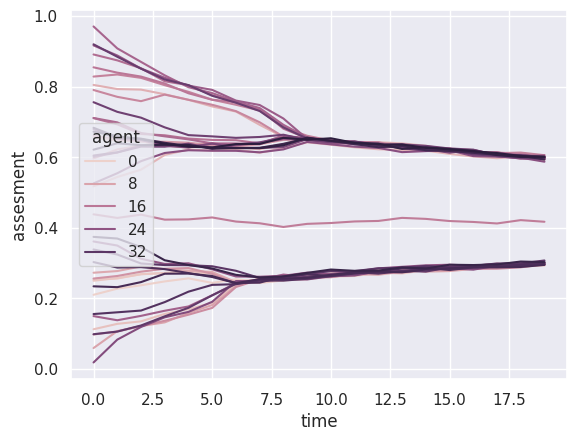

In [9]:
sns.set_theme()

sns.lineplot(
    data=dataframe,
    x="time", y="assesment", hue="agent")

plt.show()

(0.0, 1.0)

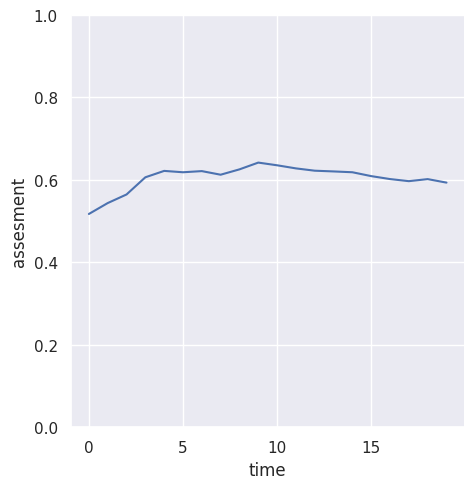

In [10]:

sns.relplot(
    dataframe[dataframe["agent"] == 5], kind="line",
    x="time", y="assesment", facet_kws={"sharex":False})
plt.ylim(0, 1)

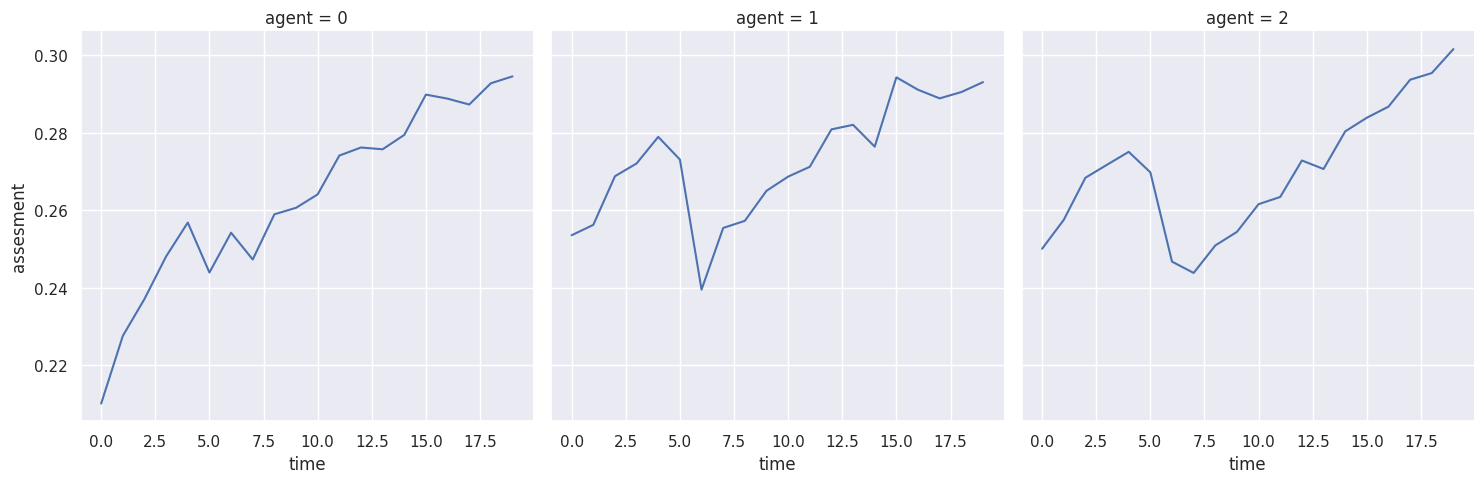

In [11]:
sns.relplot(
    data=dataframe[dataframe["agent"] < 3], kind="line",
    x="time", y="assesment", col="agent")

plt.show()

In [12]:
dataframe[dataframe["agent"] < 1]

,agent,time,assesment
0,0,0,0.210162
40,0,1,0.227609
80,0,2,0.237115
120,0,3,0.248089
160,0,4,0.256808
200,0,5,0.243929
240,0,6,0.254191
280,0,7,0.247290
320,0,8,0.258937
360,0,9,0.260611


In [13]:
dataframe[dataframe["time"] == 0]

,agent,time,assesment
0,0,0,0.210162
1,1,0,0.253538
2,2,0,0.250060
3,3,0,0.112630
4,4,0,0.655517
5,5,0,0.517359
6,6,0,0.804549
7,7,0,0.272674
8,8,0,0.059395
9,9,0,0.596386


In [14]:
from matplotlib.figure import Figure

figure = Figure(figsize=(6, 6))
ax = figure.subplots()

test = pd.DataFrame(data=[[0, 1], [1, 2], [2, 1]], columns=["time", "value"])
f = sns.lineplot(
    data=test,
    x="time", y="value", ax=ax)

In [15]:
dataframe.to_csv("agent_data.csv")